In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

In [3]:
df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(["Cabin","PassengerId","Name","Ticket"],axis = 1,inplace = True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Replace with mean and mode value

In [9]:
mean =df["Age"].mean()
df['Age'] = df['Age'].replace(np.nan,mean)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
mode1=df["Embarked"].mode().values[0]
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df = pd.get_dummies(df,columns =["Sex","Embarked","Pclass"],drop_first = True)

In [14]:
df

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,1,0,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,1
3,1,35.000000,1,0,53.1000,0,0,1,0,0
4,0,35.000000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1,1,0
887,1,19.000000,0,0,30.0000,0,0,1,0,0
888,0,29.699118,1,2,23.4500,0,0,1,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,0


In [15]:
x = df.drop(["Survived"],axis = 1)
y = df[["Survived"]]

In [16]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = 0)

In [17]:
model_1 = LogisticRegression(solver="liblinear")
model_1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [18]:
model_1.score(x_train,y_train)

0.8089887640449438

In [19]:
model_1.score(x_test,y_test)

0.8022388059701493

In [20]:
predictions=model_1.predict(x_test)

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,predictions)

0.8022388059701493

<Axes: >

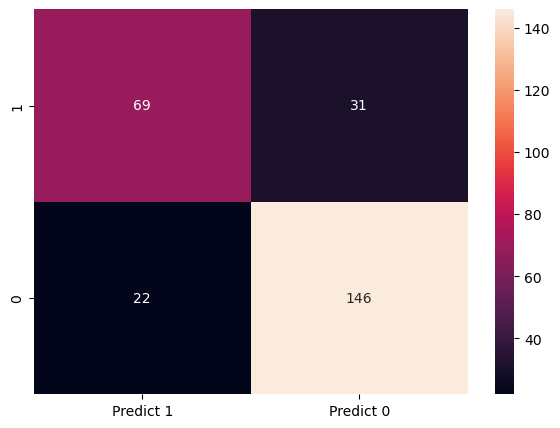

In [23]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt="g")

In [24]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       168
           1       0.76      0.69      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



#### KNN MODEL

In [25]:
model_1=KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')
model_1.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [26]:
model_1.score(x_train,y_train)

0.9791332263242376

In [27]:
model_1.score(x_test,y_test)

0.7350746268656716

In [30]:
predicts = model_1.predict(x_test)
model_1.score(x_test, y_test)

0.7350746268656716

### DECISIONTREE

In [42]:
model_1=DecisionTreeClassifier(criterion="entropy",max_depth=3)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
model_1.score(x_train,y_train)

0.8362760834670947

In [44]:
model_1.score(x_test,y_test)

0.8208955223880597

In [47]:
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [50]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(model_1, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()